#Домашняя работа № 1. Временные ряды, общая теория

##Загрузим данные

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [3]:
# загрузим данные
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._Лекция_tsml.zip'

--2025-02-13 14:57:09--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip’

1._Лекция_tsml.zip  100%[===================>] 751.03K   682KB/s    in 1.1s    

2025-02-13 14:57:11 (682 KB/s) - ‘1._Лекция_tsml.zip’ saved [769056/769056]



In [4]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

In [5]:
# прочитаем
# 1. ежемесячные распродажи_компании_x_jan_6
monthly_sales_of_company_x_jan_6 = pd.read_csv('/content/unpacked_files/Series/monthly-sales-of-company-x-jan-6.csv')
# 2. ежемесячные_бостонские вооруженные_ ограбления_j
monthly_boston_armed_robberies_j = pd.read_csv('/content/unpacked_files/Series/monthly-boston-armed-robberies-j.csv')
# 3. международные авиалинии_пассажиров
international_airline_passengers = pd.read_csv('/content/unpacked_files/Series/international-airline-passengers.csv')
# 4. средняя_месячная_воздушная_температура_дег
mean_monthly_air_temperature_deg = pd.read_csv('/content/unpacked_files/Series/mean-monthly-air-temperature-deg.csv')
# 5. еженедельные публикации о Доу-Джонсе_
weekly_closings_of_the_dowjones_ = pd.read_csv('/content/unpacked_files/Series/weekly-closings-of-the-dowjones-.csv')
# 6. ежедневные_общественные_ женские_рождения в_калифорнии
daily_total_female_births_in_cal = pd.read_csv('/content/unpacked_files/Series/daily-total-female-births-in-cal.csv')

Позаимствуем функции из лекции

In [6]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

##1. monthly_sales_of_company_x_jan_6

In [19]:
series = monthly_sales_of_company_x_jan_6['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


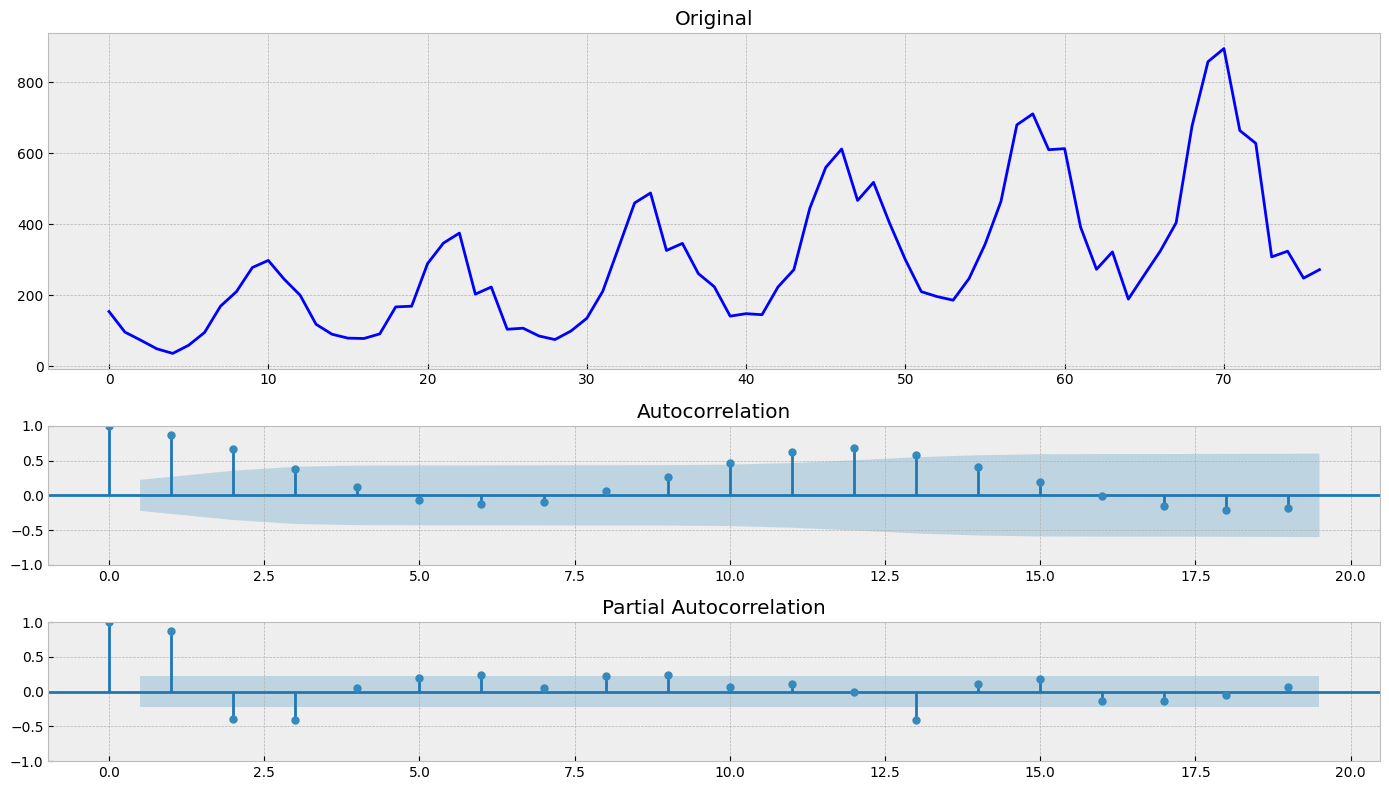

In [20]:
# посмотрим первоначальный вариант
tsplot(series)

1. Детерминирование тренда (detrending)

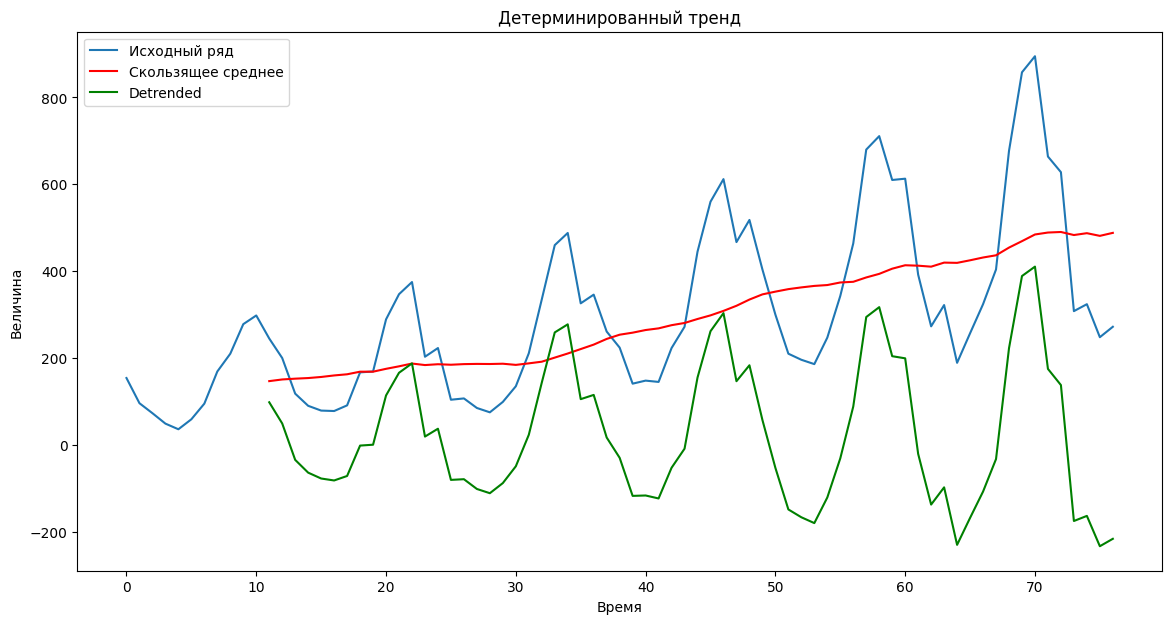

In [47]:
# вычислим скользящее среднее

# установим размер окна
# (70-0)/6
window = 12
# вычислим скользящее среднее
rolling_mean = series.rolling(window=window).mean()

# детерминируем тренд
detrended = series - rolling_mean

plt.figure(figsize=(14, 7))
plt.plot(series, label='Исходный ряд')
plt.plot(rolling_mean, label='Скользящее среднее', color='red')
plt.plot(detrended, label='Detrended', color='green')
plt.title('Детерминированный тренд')
plt.xlabel('Время')
plt.ylabel('Величина')
plt.grid(False)
plt.legend()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                 -1.158352
p-value                         0.691250
#Lags Used                     11.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


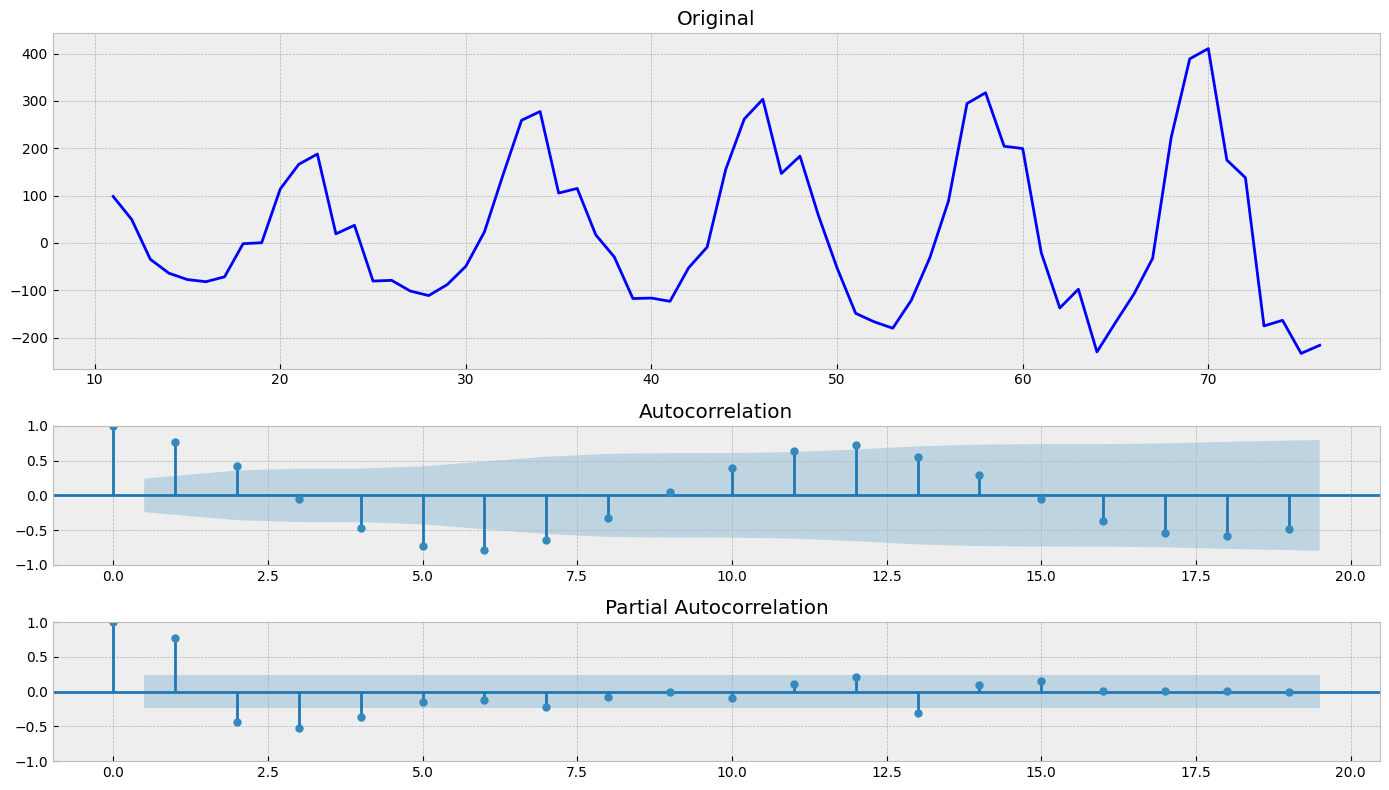

In [50]:
# посмотрим результат
tsplot(detrended.dropna())

2. Применим дифференцирование к детерминированному ряду

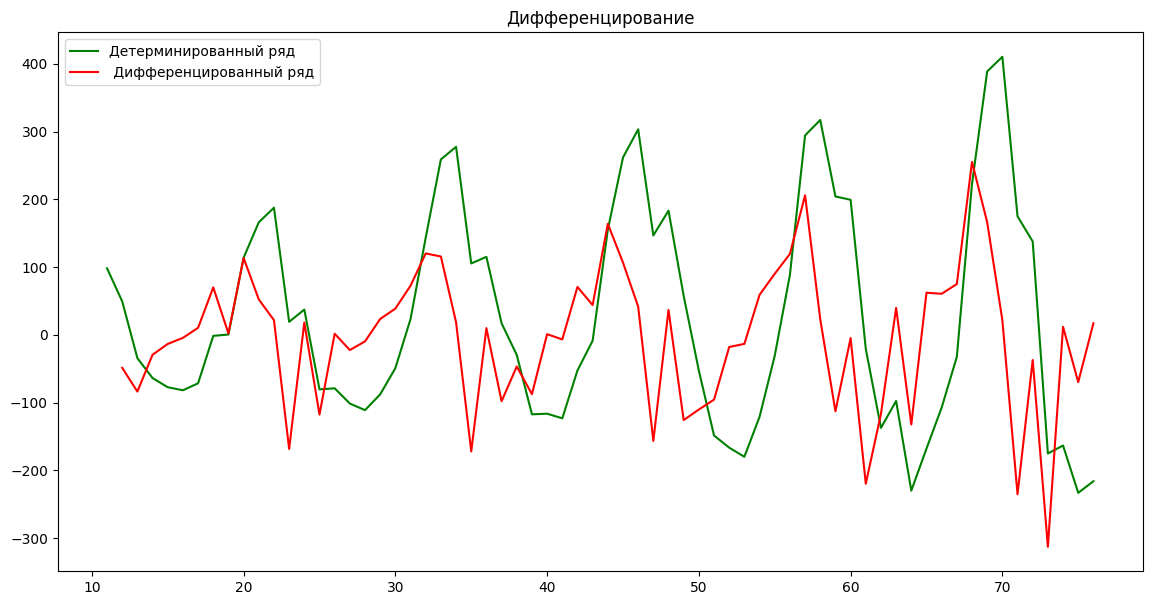

In [59]:
differenced = detrended.dropna().diff().dropna()

plt.figure(figsize=(14, 7))
plt.plot(detrended.dropna(), label='Детерминированный ряд', color='green')
plt.plot(differenced, label=' Дифференцированный ряд', color='red')
plt.title('Дифференцирование')
plt.grid(False)
plt.legend()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                 -3.677674
p-value                         0.004438
#Lags Used                     11.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


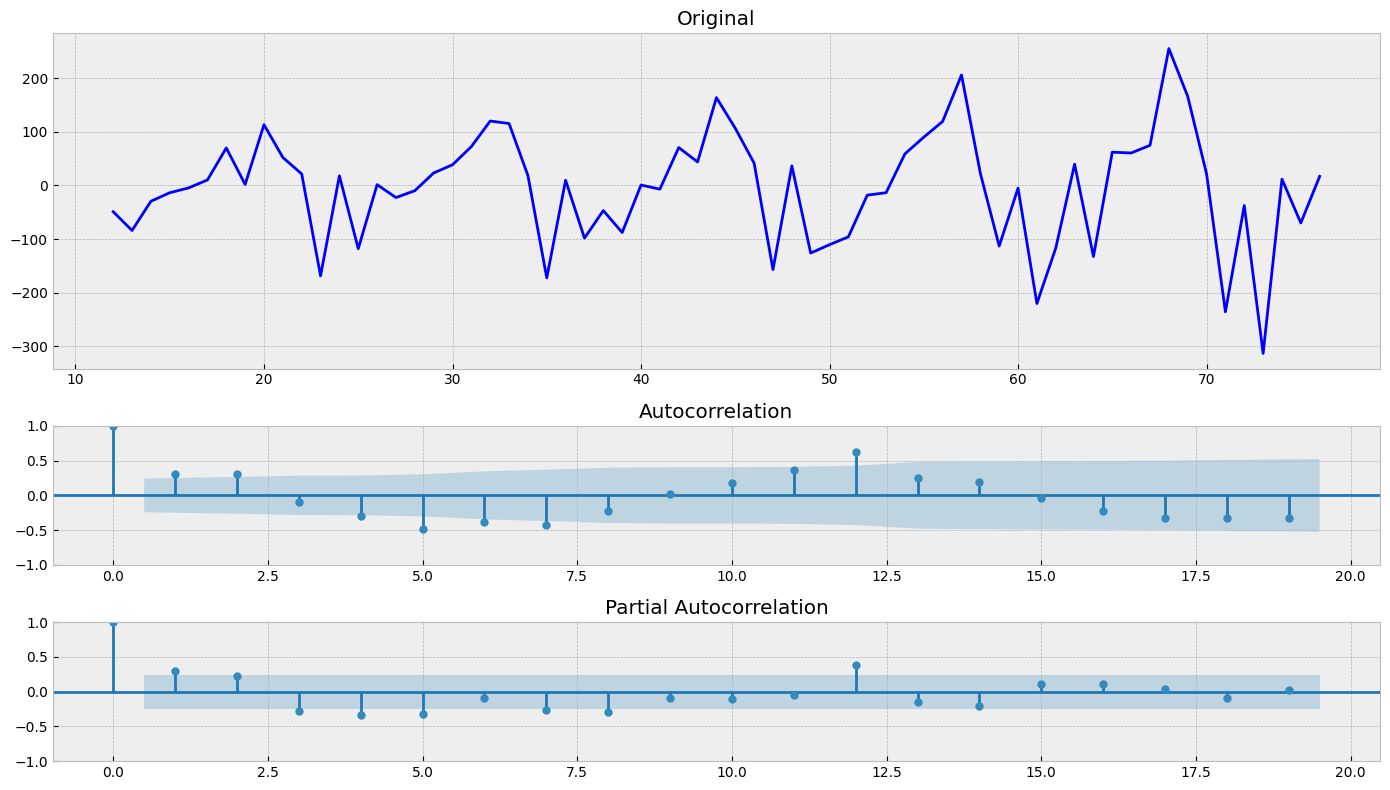

In [60]:
# посмотрим результат
tsplot(differenced)

##2. monthly_boston_armed_robberies_j

In [63]:
series = monthly_boston_armed_robberies_j['Count']